# Módulo 8. Aprendizaje no supervisado

¡Bienvenidos al octavo módulo! Durante todo el curso, hemos trabajado con metodologías basadas en aprendizaje supervisado. En el proceso de entrenamiento, le introduciamos a la red la verdad absoluta (GT) para que intente reducir en lo máximo posible el error obtenido mediante el conocido Gradient Descent. Sin embargo, existen otras metodologías que trabajan de otra forma y que no necesitan una etiqueta para su aprendizaje. El objetivo de esta sesión es que conozcamos y nos familiarizaremos con algunas de las más conocidas y sus tareas asociadas.

En este módulo estudiaremos lo siguiente:

1. **¿Qué es el aprendizaje no supervisado?**

2. **Autoencoders**

 <ul>
   2.1 Reducción de la dimensionalidad

   2.2 Eliminación de ruido

   2.3 Detección de anomalías
   </ul>

3. **Variational Autoencoders**

3. **Generative Adversarial Neural Network (GANs)**


## **1. ¿Qué es el aprendizaje no supervisado?** 

Los algoritmos de machine y deep learning son frecuentemente clasificados en dos categorías: aprendizaje supervisado y aprendizaje no supervisado. La diferencia entre estas categorías depende del tipo de datos con el que estemos lidiando: el aprendizaje supervisado lidia con datos etiquetados (la etiqueta es lo que estamos intentando predecir) mientras que el aprendiza no supervisado lidia con datos no etiquetados.

Para ilustrar las distinciones entre aprendizaje supervisado y no supervisado, tomemos el ejemplo de las imágenes. El aprendizaje supervisado se ocupa del caso en el que tenemos las imágenes y las etiquetas de lo que está contenido en la imagen (por ejemplo, gato). El aprendizaje no supervisado se ocupa del caso en el que solo tenemos las imágenes.


<center> <img src="https://i.ibb.co/02W8cSb/aprendizaje-no-supervisado.png" border="0"> </center> </a>

**¿Por qué utilizar aprendizaje no supervisado?**


* Mucho más datos sin etiquetar que etiquetados:
    1.   Grandes datos --> mejores modelos
    2.   Lo ideal es no pagar por anotaciones
    3. Descubrir la estructura de los datos: ¿Cuáles son las características importantes en el conjunto de datos?

 

## **2. Autoencoders** 
Los autoencoders son una técnica de aprendizaje no supervisada en la que aprovechamos las redes neuronales para la tarea de aprendizaje de representación. Específicamente, el objetivo es diseñar una arquitectura de red neuronal tal que impongamos un cuello de botella (bottleneck) en la red que obligue a generar una representación comprimida, con una dimension menor de la entrada original. Por lo tanto, el autoencoder, internamente comprime los datos de entrada en un espacio latente y posteriormente, reconstruye los datos de entrada de ese espacio latente. Idealmente, el output del autoencoder debe ser idéntico a la entrada.

Por lo general, un algoritmo basado en autoencoder tiene dos componentes o subredes:

 

*   **Codificador (Encoder)**: acepta los datos de entrada y los comprime en el espacio latente. Si denotamos nuestros datos de entrada como x y el codificador como E, entonces la representación del espacio latente de salida, s, sería s=(x).
*   **Decodificador (Decoder)**: El decodificador es responsable de aceptar las representaciones de espacio latente y luego reconstruir la entrada original. Si denotamos la función del decodificador como D y la salida del detector como o, entonces podemos representar el decodificador como o = D(s).


<center> <a href="https://ibb.co/hWqjG7"><img src="https://i.ibb.co/kDn442m/autoencoder.png" alt="IA engloba ML, que a su vez engloba DL" border="0"> </center> </a>


Durante el proceso de entrenamiento, el objetivo de un autoencoder es entrenar una red que pueda aprender a reconstruir nuestros datos de entrada. Por tanto, la función de pérdidas que se suele utilizar en este caso es el MSE, donde comparamos los datos de entrada con los datos generados. El objetivo es que el error generado sea el mínimo posible. El verdadero valor del codificador automático vive dentro de esa **representación de espacio latente**. Tened en cuenta que los codificadores automáticos comprimen nuestros datos de entrada y, más concretamente, cuando entrenamos codificadores automáticos, lo que realmente nos importa es el codificador, E, y la representación del espacio latente, s = E(x).

El decodificador, o = D(s), se usa para entrenar el codificador automático de extremo a extremo, pero en aplicaciones prácticas, a menudo (pero no siempre) nos preocupamos más por el codificador y el espacio latente.

Y bien, ¿para qué  se utilizan los autoencoder?

Las aplicaciones más típicas son las siguientes:


*   **Reducción de dimensionalidad** (es decir, como una PCA pero más potente/inteligente).
*   **Eliminación de ruido** (p. ej., eliminación de ruido y preprocesamiento de imágenes para mejorar la precisión de OCR).

* **Detección de anomalías/valores atípicos** (p. ej., detectar puntos de datos mal etiquetados en un conjunto de datos o detectar cuándo un punto de datos de entrada se encuentra fuera de nuestra distribución típica de datos).


Fuera del campo de computer vision, se utilizarán codificadores automáticos aplicados al procesamiento del lenguaje natural (NLP) y problemas de comprensión de texto, incluida la comprensión del significado semántico de las palabras, la construcción de incrustaciones de palabras e incluso el resumen de texto.

Ahora que conocemos un poco más como funcionan los autoencoder vamos a ponernos a trabajar!!!

##2.1 Reducción de la dimensionalidad ##

Vamos a empezar entrenando un codificador automático en el conjunto de datos MNIST. Como ya conocéis de los modelos anteriores, el conjunto de datos MNIST consta de dígitos de 28 × 28 píxeles con un solo canal, lo que implica que cada dígito está representado por 28 x 28 = 784 valores. El codificador automático que vamos adesarrollar hoy  podrá comprimir esos dígitos en un vector de solo 16 valores, ¡esa es una reducción de casi el 98%!

In [1]:
# Importamos los paquetes necesarios
from tensorflow.keras.layers import BatchNormalization, Conv2D, Conv2DTranspose, LeakyReLU, Activation, Flatten, Dense
from tensorflow.keras.layers import Reshape, Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2

In [2]:
# Construimos la clase donde alberageremos la estructura de autoencoder convolucional. En este caso, introducimos la progrmación en clases.

class ConvAutoencoder:
	@staticmethod
	def build(width, height, depth, filters=(32, 64), latentDim=16):
		# initialize the input shape to be "channels last" along with
		# the channels dimension itself
		# channels dimension itself
		inputShape = (height, width, depth)
		chanDim = -1
    		# define the input to the encoder
		inputs = Input(shape=inputShape)
		x = inputs
		# loop over the number of filters
		for f in filters:
			# apply a CONV => RELU => BN operation
			x = Conv2D(f, (3, 3), strides=2, padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)
		# flatten the network and then construct our latent vector
		volumeSize = K.int_shape(x)
		x = Flatten()(x)
		latent = Dense(latentDim)(x)
		# build the encoder model
		encoder = Model(inputs, latent, name="encoder")
  		# start building the decoder model which will accept the
		# output of the encoder as its inputs
		latentInputs = Input(shape=(latentDim,))
		x = Dense(np.prod(volumeSize[1:]))(latentInputs)
		x = Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)
		# loop over our number of filters again, but this time in
		# reverse order
		for f in filters[::-1]:
			# apply a CONV_TRANSPOSE => RELU => BN operation
			x = Conv2DTranspose(f, (3, 3), strides=2,
				padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)
   		# apply a single CONV_TRANSPOSE layer used to recover the
		# original depth of the image
		x = Conv2DTranspose(depth, (3, 3), padding="same")(x)
		outputs = Activation("sigmoid")(x)
		# build the decoder model
		decoder = Model(latentInputs, outputs, name="decoder")
		# our autoencoder is the encoder + decoder
		autoencoder = Model(inputs, decoder(encoder(inputs)),
			name="autoencoder")
		# return a 3-tuple of the encoder, decoder, and autoencoder
		return (encoder, decoder, autoencoder)

In [3]:

# Cargamos la base de datos de MNIST
print("[INFO] loading MNIST dataset...")
((trainX, _), (testX, _)) = mnist.load_data()
# Añadimos la dimensión relativa al canal y normalizamos las imágenes
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] loading MNIST dataset...
11490434/11490434 [==============================] - 1s 0us/step


In [4]:
# Inicializamos el número de épocas y bs
EPOCHS = 25
BS = 32

#Entrenamos nuestra red Autoencoder convolucional
print("[INFO] building autoencoder...")
(encoder, decoder, autoencoder) = ConvAutoencoder.build(28, 28, 1)
opt = Adam(lr=1e-3)
autoencoder.compile(loss="mse", optimizer=opt)
# train the convolutional autoencoder
H = autoencoder.fit(
	trainX, trainX,
	validation_data=(testX, testX),
	epochs=EPOCHS,
	batch_size=BS)


[INFO] building autoencoder...


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
1875/1875 [==============================] - 17s 5ms/step - loss: 0.0185 - val_loss: 0.0109
Epoch 2/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0092 - val_loss: 0.0098
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 7/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 8/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0076 - val_loss: 0.0078
Epoch 9/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 10/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0

Como se puede ver durante el entrenamiento, nuestro proceso de entrenamiento ha sido capaz de minimizar la pérdida de reconstrucción del codificador automático. Pero, la pregunta del millón, ¿cómo de bien se han reconstruido las imágenes en base a los datos de entrenamiento?

Más vale una imagen que palabras, vamos a verlo:

[INFO] making predictions...


Text(0.5, 1.0, 'Imagen reconstruida')

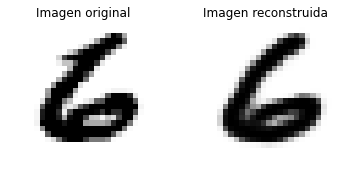

In [ ]:
import matplotlib.pyplot as plt
import numpy
print("[INFO] making predictions...")
decoded = autoencoder.predict(testX)
outputs = None
# loop over our number of output samples
for i in range(0, len(testX)):
	# grab the original image and reconstructed image
	original = (testX[i] * 255).astype("uint8")
	recon = (decoded[i] * 255).astype("uint8")
	# stack the original and reconstructed image side-by-side
	output = np.hstack([original, recon])
	# if the outputs array is empty, initialize it as the current
	# side-by-side image display

plt.figure()
plt.subplot(1,2,1)
plt.imshow(numpy.squeeze(original, axis=-1), cmap=plt.get_cmap('gray_r'))
plt.axis('off')
plt.title('Imagen original')
plt.subplot(1,2,2)
plt.imshow(numpy.squeeze(recon, axis=-1), cmap=plt.get_cmap('gray_r'))
plt.axis('off')
plt.title('Imagen reconstruida')


Como habréis podido comprobar, nuestra red ha sido capaz de recontruir las imágenes de MNIST sin ningún tipo de problema!!!!


##2.2 Eliminación de ruido##

Una vez que hemos aprendido a reconstruir imágenes a partir de un espacio latente de una dimensión muy reducida, ahora vamos a aplicar autoencoder a otra tarea esencial en computer vision, eliminación de ruido. 

Los codificadores automáticos de eliminación de ruido son una extensión de los codificadores automáticos simples; sin embargo, vale la pena señalar que los codificadores automáticos de eliminación de ruido no estaban destinados originalmente a eliminar automáticamente el ruido de una imagen.


<center> <img src="https://i.ibb.co/G55Y63Y/autoencoder-denoising.png" alt="IA engloba ML, que a su vez engloba DL" border="0"> </center> </a>



In [ ]:
# Importamos los paquetes necesarios
from tensorflow.keras.layers import BatchNormalization, Conv2D, Conv2DTranspose, LeakyReLU, Activation, Flatten, Dense, Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np

In [ ]:
class ConvAutoencoder:
	@staticmethod
	def build(width, height, depth, filters=(32, 64), latentDim=16):
		# initialize the input shape to be "channels last" along with
		# the channels dimension itself
		# channels dimension itself
		inputShape = (height, width, depth)
		chanDim = -1
		# define the input to the encoder
		inputs = Input(shape=inputShape)
		x = inputs
    		# loop over the number of filters
		for f in filters:
			# apply a CONV => RELU => BN operation
			x = Conv2D(f, (3, 3), strides=2, padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)
		# flatten the network and then construct our latent vector
		volumeSize = K.int_shape(x)
		x = Flatten()(x)
		latent = Dense(latentDim)(x)
		# build the encoder model
		encoder = Model(inputs, latent, name="encoder")
  		# start building the decoder model which will accept the
		# output of the encoder as its inputs
		latentInputs = Input(shape=(latentDim,))
		x = Dense(np.prod(volumeSize[1:]))(latentInputs)
		x = Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)
		# loop over our number of filters again, but this time in
		# reverse order
		for f in filters[::-1]:
			# apply a CONV_TRANSPOSE => RELU => BN operation
			x = Conv2DTranspose(f, (3, 3), strides=2,
				padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)
		# apply a single CONV_TRANSPOSE layer used to recover the
		# original depth of the image
		x = Conv2DTranspose(depth, (3, 3), padding="same")(x)
		outputs = Activation("sigmoid")(x)
		# build the decoder model
		decoder = Model(latentInputs, outputs, name="decoder")
		# our autoencoder is the encoder + decoder
		autoencoder = Model(inputs, decoder(encoder(inputs)),
			name="autoencoder")
		# return a 3-tuple of the encoder, decoder, and autoencoder
		return (encoder, decoder, autoencoder)

In [ ]:
# Cargamos la base de datos de MNIST y en este caso le añadimos ruido que luego trataremos de eliminar con nuestro modelo

print("[INFO] loading MNIST dataset...")
((trainX, _), (testX, _)) = mnist.load_data()

trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

trainNoise = np.random.normal(loc=0.5, scale=0.5, size=trainX.shape)
testNoise = np.random.normal(loc=0.5, scale=0.5, size=testX.shape)
trainXNoisy = np.clip(trainX + trainNoise, 0, 1)
testXNoisy = np.clip(testX + testNoise, 0, 1)

[INFO] loading MNIST dataset...


In [ ]:
print("[INFO] building autoencoder...")
(encoder, decoder, autoencoder) = ConvAutoencoder.build(28, 28, 1)
opt = Adam(lr=1e-3)
autoencoder.compile(loss="mse", optimizer=opt)
# train the convolutional autoencoder
H = autoencoder.fit(
	trainXNoisy, trainX,
	validation_data=(testXNoisy, testX),
	epochs=EPOCHS,
	batch_size=BS)

[INFO] building autoencoder...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0280 - val_loss: 0.0191
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0189 - val_loss: 0.0189
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0179 - val_loss: 0.0174
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0172 - val_loss: 0.0171
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0169 - val_loss: 0.0173
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0165 - val_loss: 0.0169
Epoch 7/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0163 - val_loss: 0.0174
Epoch 8/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0161 - val_loss: 0.0172
Epoch 9/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0159 - val_loss: 0.0172
Epoch 10/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [ ]:
import matplotlib.pyplot as plt
import numpy
print("[INFO] making predictions...")
decoded = autoencoder.predict(testX)
outputs = None
# loop over our number of output samples
for i in range(0, len(testX)):
	# grab the original image and reconstructed image
	original = (testXNoisy[i] * 255).astype("uint8")
	recon = (decoded[i] * 255).astype("uint8")
	# stack the original and reconstructed image side-by-side

plt.figure()
plt.subplot(1,2,1)
plt.imshow(numpy.squeeze(original, axis=-1), cmap=plt.get_cmap('gray_r'))
plt.axis('off')
plt.title('Imagen original')
plt.subplot(1,2,2)
plt.imshow(numpy.squeeze(recon, axis=-1), cmap=plt.get_cmap('gray_r'))
plt.axis('off')
plt.title('Imagen reconstruida')

## 2.3 Detección de anomalías

En este ejemplo, vamos a usar autoencoder para la detección de movimientos bancarios fraudulentos. Link a la base de datos: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Y, ¿cómo se entrena un autoencoder para la detección de anomalías en una base de datos? La idea es que durante el entrenamiento del autoencoder, solo ingresemos transacciones normales. El bottleneck  aprenderá la representación latente de los datos de entrada normales. El decodificador utilizará la salida del bottleneck para reconstruir las transacciones normales de los datos de entrada originales.

Una transacción fraudulenta será diferente de una transacción normal. El Autoencoder tendrá problemas para reconstruir la transacción fraudulenta y, por lo tanto, el error de reconstrucción será alto.

Esbleceremos una transacción como fraudulenta en función de un valor de umbral especificado para el error de reconstrucción.

Vamos a ello!

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model

RANDOM_SEED = 2021 
TEST_PCT = 0.3
LABELS = ["Normal","Fraud"]

In [ ]:
# Cargamos la base de datos

#from google.colab import drive
#drive.mount('/content/drive')
#dataset = pd.read_csv("./drive/MyDrive/Keep_coding/carpeta_personal/Apuntes_Rocío/creditcard.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Directamente podemos acceder a la base de datos
!wget -O creditfraud.zip https://www.dropbox.com/s/tl20yp9bcl56oxt/creditcardfraud.zip?dl=0

--2023-02-08 18:26:48--  https://www.dropbox.com/s/tl20yp9bcl56oxt/creditcardfraud.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/tl20yp9bcl56oxt/creditcardfraud.zip [following]
--2023-02-08 18:26:49--  https://www.dropbox.com/s/raw/tl20yp9bcl56oxt/creditcardfraud.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5eaab8523fdddd3ed923412ee0.dl.dropboxusercontent.com/cd/0/inline/B2HV7XZnlocmOYfCngjTmFWSoqN1KetQn0Mey05rDeDtuxs45sjl-LQHh_lXcruTK9xDP0pi0JkVqgQFkybLnG6Xqi_9saa9NmuTL4VrAIYqZ43SqnDcHX-3ectY66FeQQW17aUmhMF8sC1_dU-nShaP03XRVhJulu-YAQTfQSC-Ww/file# [following]
--2023-02-08 18:26:50--  https://uc5eaab8523fdddd3ed923412ee0.dl.dropboxusercontent.com/cd/0/inline/B2HV7XZnlocmOYfCngjTmFWSoqN1KetQn0Mey05rDeDtuxs45sj

In [9]:
!unzip creditfraud.zip
dataset = pd.read_csv('creditcard.csv')
dataset.head()

Archive:  creditfraud.zip
  inflating: creditcard.csv          


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# Hacemos un análisis exploratorio de los datos
print("Any nulls in the dataset ",dataset.isnull().values.any() )
print('-------')
print("No. of unique labels ", len(dataset['Class'].unique()))
print("Label values ",dataset.Class.unique())
#0 is for normal credit card transaction
#1 is for fraudulent credit card transaction
print('-------')
print("Break down of the Normal and Fraud Transactions")
print(pd.value_counts(dataset['Class'], sort = True) )

Any nulls in the dataset  False
-------
No. of unique labels  2
Label values  [0 1]
-------
Break down of the Normal and Fraud Transactions
0    284315
1       492
Name: Class, dtype: int64


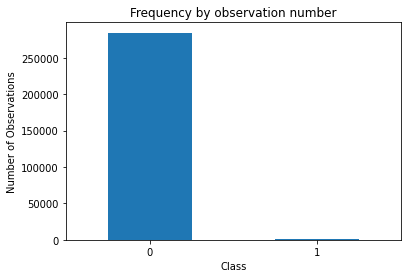

In [11]:
# Visualizamos los datos
count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(dataset['Class'].unique())), dataset.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [ ]:
# Estandarizamos las variables amount y borramos time 
dataset = dataset.drop(['Time'], 1)
sc=StandardScaler()
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))

# Dividimos los datos en train y test (recordamos que no hace falta validación son algoritmos no supervisados)
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Class',1) , dataset['Class'], test_size=0.5, random_state=0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [ ]:
# Vamos a separar los datos por clase, de esta forma estableceremos los datos con lo que tenemos que entrenar
X_train_normal = X_train[y_train==0]
X_train_fraud = X_train[y_train==1]
print(" No. of records in Fraud Train Data=",len(X_train_fraud))
print(" No. of records in Normal Train data=",len(X_train_normal))

 No. of records in Fraud Train Data= 249
 No. of records in Normal Train data= 142154


In [ ]:
input_layer = Input(shape=(29, ))
encoded = Dense(12,activation='tanh')(input_layer)
decoded = Dense(29,activation='sigmoid')(encoded)
autoencoder = Model(input_layer,decoded)

In [ ]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')
autoencoder.fit(X_train_normal, X_train_normal, epochs = 100, batch_size=128,
validation_data=(X_train_normal,X_train_normal))

Epoch 1/100
1111/1111 [==============================] - 8s 5ms/step - loss: 0.9979 - val_loss: 0.8844
Epoch 2/100
1111/1111 [==============================] - 4s 4ms/step - loss: 0.8589 - val_loss: 0.8414
Epoch 3/100
1111/1111 [==============================] - 4s 4ms/step - loss: 0.8313 - val_loss: 0.8226
Epoch 4/100
1111/1111 [==============================] - 4s 4ms/step - loss: 0.8164 - val_loss: 0.8108
Epoch 5/100
1111/1111 [==============================] - 4s 4ms/step - loss: 0.8064 - val_loss: 0.8024
Epoch 6/100
1111/1111 [==============================] - 4s 4ms/step - loss: 0.7993 - val_loss: 0.7963
Epoch 7/100
1111/1111 [==============================] - 5s 5ms/step - loss: 0.7942 - val_loss: 0.7920
Epoch 8/100
1111/1111 [==============================] - 4s 4ms/step - loss: 0.7904 - val_loss: 0.7888
Epoch 9/100
1111/1111 [==============================] - 5s 5ms/step - loss: 0.7875 - val_loss: 0.7863
Epoch 10/100
1111/1111 [==============================] - 5s 5ms/step - l

In [ ]:
# Detección de anomalías. Las anomalías serán aquellos puntos de datos donde las pérdidas de reconstrucción son altas
predictions = autoencoder.predict(X_train)
mse = np.mean(np.power(X_train - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_train})
error_df.groupby('true_class').describe()

reconstruction_error                                            \
                          count       mean        std       min       25%   
true_class                                                                  
0                      142154.0   0.768915   3.436716  0.036295  0.232619   
1                         249.0  30.295067  43.108713  0.153691  4.245909   

                                              
                  50%        75%         max  
true_class                                    
0            0.395485   0.648300  317.607985  
1           10.904727  27.281778  278.577631

In [ ]:
# Detección de anomalías. Las anomalías serán aquellos puntos de datos donde las pérdidas de reconstrucción son altas
test_x_predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})
y_pred=[(lambda er: 1 if er>=11  else 0)(er) for er in mse]

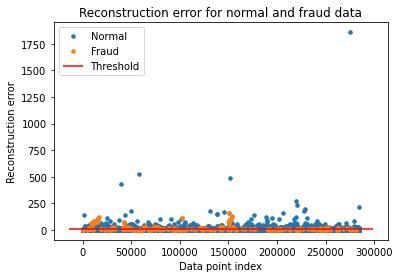

In [ ]:
# Ploteamos los puntos de test y su respectivo error de reconstrucción y establecemos un valor a partir del cuán el punto se considera anómalo.
threshold_fixed = 11
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

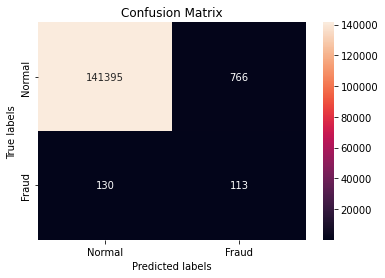

In [ ]:
# Evaluamos la performance de nuestro modelo
from sklearn import metrics
import matplotlib.ticker as ticker
conf_matrix = metrics.confusion_matrix(y_test,y_pred)

ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='g')#annot=True to annotate cells, fmt='g' numbers not scientific form
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Fraud']); ax.yaxis.set_ticklabels(['Normal', 'Fraud']);
ax.set(yticks=[0, 2], 
       xticks=[0.5, 1.5])
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))

## **3. Variarional Autoencoder**

El Autoencoder variacional es ligeramente diferente al autoencoder clásico. En lugar de aprender directamente de las características latentes de las muestras de entrada, aprende de su distribución. Se supone que las características latentes de los datos de entrada siguen una distribución normal estándar. Esto significa que se supone que los vectores latentes aprendidos están centrados en cero y se pueden representar con dos estadísticas: media y varianza (ya que la distribución normal estándar se puede atribuir solo con estas dos estadísticas).
Por lo tanto, los autoencoders variacionales (VAE) calculan la media y la varianza de los vectores latentes (en lugar de aprender directamente las características latentes) para cada muestra y las obligan a seguir una distribución normal estándar. Por lo tanto, el bottleneck de la red se utiliza para conocer la media y la varianza de cada muestra. Definiremos dos capas diferentes totalmente conectadas (FC) para calcular ambas. Los VAE aseguran que los puntos que están muy cerca uno del otro en el espacio latente representan muestras de datos muy similares (clases de datos similares). 

<center> <img src="https://i.ibb.co/g4XLjTx/VAE.png" alt="Arquiitectura VAE" border="0"> </center> </a>

Antes de saltar a los detalles de implementación, primero entendamos un poco la divergencia Kullback-Leibler (KL) que se utilizará como una de las dos medidas de optimización en nuestro modelo.


**Divergencia Kullback-Leibler (KL)**

Como hemos comentado, la principal diferencia entre un autoencoder convencional y variational autoencoder reside en que este último fuerza a que las características del estado latente cumplan una distribución normal estándar. Esto se puede lograr utilizando estadísticas de divergencia KL. KL-divergencia es una medida estadística de la diferencia entre dos distribuciones probabilísticas. Por lo tanto, utilizaremos el valor de divergencia KL como una función objetivo (junto con la pérdida de reconstrucción que ya utilizabamos en el autoencoder convencional) para garantizar que la distribución aprendida sea muy similar a la distribución real, que ya hemos asumido como una distribución normal estándar.

Por tanto, las pérdidas de nuestro modelo vendrán dadas por:


<center> <img src="https://i.ibb.co/YQg5SpG/VAE-error.png"  </center> </a>



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Importamos la base de datos de MNIST
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
# En este caso, juntamos los datos de entrenamiento y test porque vamos a realizar
# la tarea de generación de imágenes
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Genereamos la capa de sampling (final de la parte de autoencer)
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
# Definimos la parte del encoder
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 3136)         0           ['conv2d_1[0][0]']               
                                                                                            

In [ ]:
# Definimos la parte de decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 1)        289 

In [ ]:
# Definimos el entrenamiento de una red. En este caso, haremos uso de gradientTape.
# Esta función se utiliza cuando el aprendizaje es más complejo de realizar
# En este caso, podemos definirnos nuestro propio entrenamiento

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [ ]:
# Generamos el modelo VAE, compilamos y entrenamos el modelo
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

Epoch 1/30
547/547 [==============================] - 19s 9ms/step - loss: 261.1640 - reconstruction_loss: 210.9543 - kl_loss: 2.5740
Epoch 2/30
547/547 [==============================] - 5s 9ms/step - loss: 182.0774 - reconstruction_loss: 170.7184 - kl_loss: 4.6905
Epoch 3/30
547/547 [==============================] - 5s 8ms/step - loss: 165.6719 - reconstruction_loss: 159.2200 - kl_loss: 5.3815
Epoch 4/30
547/547 [==============================] - 5s 9ms/step - loss: 161.8572 - reconstruction_loss: 155.9151 - kl_loss: 5.4519
Epoch 5/30
547/547 [==============================] - 5s 9ms/step - loss: 160.1905 - reconstruction_loss: 154.1593 - kl_loss: 5.4966
Epoch 6/30
547/547 [==============================] - 5s 9ms/step - loss: 159.0417 - reconstruction_loss: 152.9522 - kl_loss: 5.5306
Epoch 7/30
547/547 [==============================] - 5s 8ms/step - loss: 158.0334 - reconstruction_loss: 151.9374 - kl_loss: 5.5680
Epoch 8/30
547/547 [==============================] - 5s 8ms/step - 

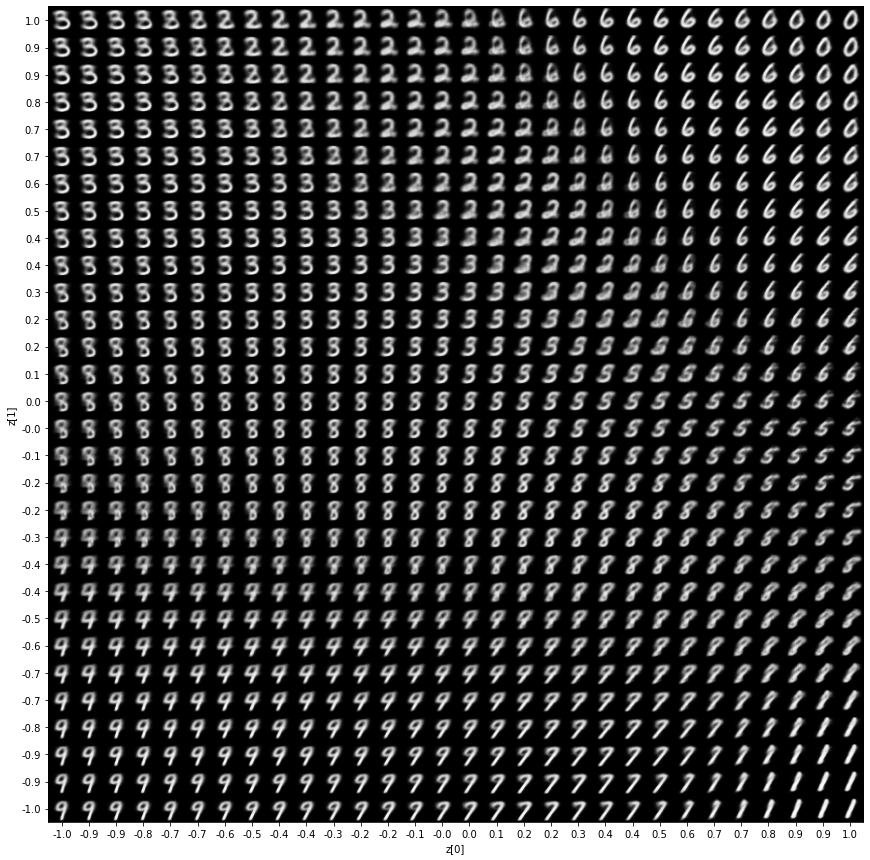

In [ ]:
# Ploteamos ahora los ejemplos generados
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

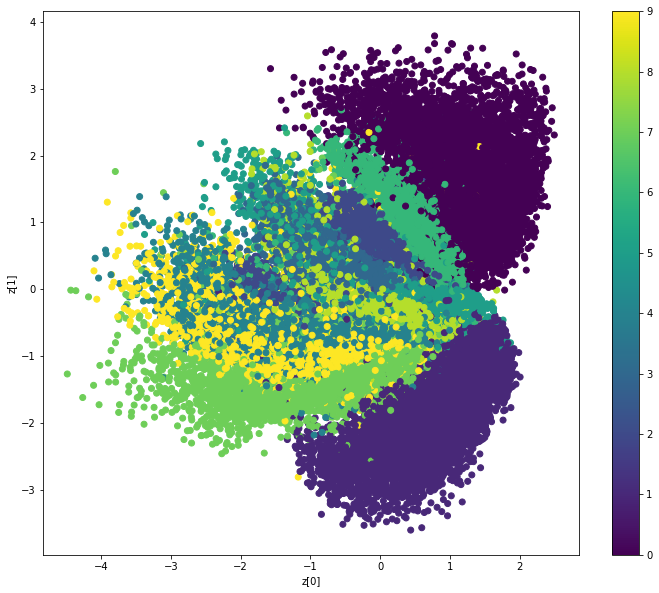

In [ ]:
# Mostramos como podemos diferenciar en cluster el espacio latente de los diferentes digitos
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)


## **4. Generative Adversarial Neural Network (GANs)**

Las GANs son un tipo muy especial de redes neuronales que se componen de 2 partes: un generador y un discriminador.

Con el siguiente esquema entenderéis mejor cómo funcionan:


<center><img src="https://cdn-images-1.medium.com/max/1600/1*N3nT9AXVnsFBta2R1eEMjg.png"></center>

Y aqui el esquema típico que veréis siempre:

<center><img src="https://cdn-images-1.medium.com/max/1600/1*N4oqJsGmH-KZg3Vqrm_uYw.jpeg"></center>



Y os preguntaréis, ¿en qué se diferencia un Autoencoder de una GAN?

Tanto las GANs como los autoencoders son modelos generativos. Sin embargo, un autoencoder esencialmente está aprendiendo una función de identidad mediante la compresión de los datos. Como ya hemos visto, el autoencoder comprimirá nuestros datos de entrada a un espacio latente de menor dimensión. Posteriormente, intentará reconstruir la entrada usando solo el vector del espacio latente.

Sin embargo, la GAN tiene las siguientes características:

* Acepta una entrada de baja dimensión.
* Construye un espacio de alta dimensión a partir de él.
* Genera el resultado final, que no forma parte de los datos de entrenamiento originales, pero idealmente pasa como tal.

A medida que se entrena una GAN, el modelo generativo genera imágenes "falsas" que luego se mezclan con imágenes "reales". El modelo discriminador debe determinar qué imágenes son "reales" frente a "falsas/generadas".

A medida que el modelo generativo se vuelve cada vez mejor en la generación de imágenes falsas que pueden engañar al discriminador, el término de pérdidas evoluciona y cambia (esta es una de las razones por las que entrenar GAN es tan difícil).

Los autoencoders no pueden generar nuevos datos realistas que los humanos podrían considerar "pasables". Por ello, para la síntesis de nuevos datos, vuestros mejores amigos serán las GANs. A continuación, vamos a desarrollar un ejemplo de síntesis de imágenes:

In [ ]:
'''
DCGAN on MNIST using Keras
Author: Rowel Atienza
Project: https://github.com/roatienza/Deep-Learning-Experiments
Usage: python3 dcgan_mnist.py
'''

import numpy as np
import time
# tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from tensorflow.keras.layers import LeakyReLU, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop

import matplotlib.pyplot as plt

class ElapsedTimer(object):
    def __init__(self):
        self.start_time = time.time()
    def elapsed(self,sec):
        if sec < 60:
            return str(sec) + " sec"
        elif sec < (60 * 60):
            return str(sec / 60) + " min"
        else:
            return str(sec / (60 * 60)) + " hr"
    def elapsed_time(self):
        print("Elapsed: %s " % self.elapsed(time.time() - self.start_time) )

class DCGAN(object):
    def __init__(self, img_rows=28, img_cols=28, channel=1):

        self.img_rows = img_rows
        self.img_cols = img_cols
        self.channel = channel
        self.D = None   # discriminator
        self.G = None   # generator
        self.AM = None  # adversarial model
        self.DM = None  # discriminator model

    # (W−F+2P)/S+1
    def discriminator(self):
        if self.D:
            return self.D
        self.D = Sequential()
        depth = 64
        dropout = 0.4
        # In: 28 x 28 x 1, depth = 1
        # Out: 14 x 14 x 1, depth=64
        input_shape = (self.img_rows, self.img_cols, self.channel)
        self.D.add(Conv2D(depth*1, 5, strides=2, input_shape=input_shape,\
            padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*2, 5, strides=2, padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*4, 5, strides=2, padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        self.D.add(Conv2D(depth*8, 5, strides=1, padding='same'))
        self.D.add(LeakyReLU(alpha=0.2))
        self.D.add(Dropout(dropout))

        # Out: 1-dim probability
        self.D.add(Flatten())
        self.D.add(Dense(1))
        self.D.add(Activation('sigmoid'))
        self.D.summary()
        return self.D

    def generator(self):
        if self.G:
            return self.G
        self.G = Sequential()
        dropout = 0.4
        depth = 64+64+64+64
        dim = 7
        # In: 100
        # Out: dim x dim x depth
        self.G.add(Dense(dim*dim*depth, input_dim=100))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))
        self.G.add(Reshape((dim, dim, depth)))
        self.G.add(Dropout(dropout))

        # In: dim x dim x depth
        # Out: 2*dim x 2*dim x depth/2
        self.G.add(UpSampling2D())
        self.G.add(Conv2DTranspose(int(depth/2), 5, padding='same'))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))

        self.G.add(UpSampling2D())
        self.G.add(Conv2DTranspose(int(depth/4), 5, padding='same'))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))

        self.G.add(Conv2DTranspose(int(depth/8), 5, padding='same'))
        self.G.add(BatchNormalization(momentum=0.9))
        self.G.add(Activation('relu'))

        # Out: 28 x 28 x 1 grayscale image [0.0,1.0] per pix
        self.G.add(Conv2DTranspose(1, 5, padding='same'))
        self.G.add(Activation('sigmoid'))
        self.G.summary()
        return self.G

    def discriminator_model(self):
        if self.DM:
            return self.DM
        optimizer = RMSprop(lr=0.0002, decay=6e-8)
        self.DM = Sequential()
        self.DM.add(self.discriminator())
        self.DM.compile(loss='binary_crossentropy', optimizer=optimizer,\
            metrics=['accuracy'])
        return self.DM

    def adversarial_model(self):
        if self.AM:
            return self.AM
        optimizer = RMSprop(lr=0.0001, decay=3e-8)
        self.AM = Sequential()
        self.AM.add(self.generator())
        self.AM.add(self.discriminator())
        self.AM.compile(loss='binary_crossentropy', optimizer=optimizer,\
            metrics=['accuracy'])
        return self.AM

class MNIST_DCGAN(object):
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channel = 1

        #self.x_train = input_data.read_data_sets("mnist",\
        	#one_hot=True).train.images
        (self.x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
        self.x_train = self.x_train.reshape(-1, self.img_rows,\
        	self.img_cols, 1).astype(np.float32)

        self.DCGAN = DCGAN()
        self.discriminator =  self.DCGAN.discriminator_model()
        self.adversarial = self.DCGAN.adversarial_model()
        self.generator = self.DCGAN.generator()

    def train(self, train_steps=2000, batch_size=256, save_interval=0):
        noise_input = None
        if save_interval>0:
            noise_input = np.random.uniform(-1.0, 1.0, size=[16, 100])
        for i in range(train_steps):
            images_train = self.x_train[np.random.randint(0,
                self.x_train.shape[0], size=batch_size), :, :, :]
            noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
            images_fake = self.generator.predict(noise)
            x = np.concatenate((images_train, images_fake))
            y = np.ones([2*batch_size, 1])
            y[batch_size:, :] = 0
            d_loss = self.discriminator.train_on_batch(x, y)

            y = np.ones([batch_size, 1])
            noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
            a_loss = self.adversarial.train_on_batch(noise, y)
            log_mesg = "%d: [D loss: %f, acc: %f]" % (i, d_loss[0], d_loss[1])
            log_mesg = "%s  [A loss: %f, acc: %f]" % (log_mesg, a_loss[0], a_loss[1])
            print(log_mesg)
            if save_interval>0:
                if (i+1)%save_interval==0:
                    self.plot_images(save2file=True, samples=noise_input.shape[0],\
                        noise=noise_input, step=(i+1))

    def plot_images(self, save2file=False, fake=True, samples=16, noise=None, step=0):
        filename = 'mnist.png'
        if fake:
            if noise is None:
                noise = np.random.uniform(-1.0, 1.0, size=[samples, 100])
            else:
                filename = "mnist_%d.png" % step
            images = self.generator.predict(noise)
        else:
            i = np.random.randint(0, self.x_train.shape[0], samples)
            images = self.x_train[i, :, :, :]

        plt.figure(figsize=(10,10))
        for i in range(images.shape[0]):
            plt.subplot(4, 4, i+1)
            image = images[i, :, :, :]
            image = np.reshape(image, [self.img_rows, self.img_cols])
            plt.imshow(image, cmap='gray')
            plt.axis('off')
        plt.tight_layout()
        if save2file:
            plt.savefig(filename)
            plt.close('all')
        else:
            plt.show()

In [ ]:
mnist_dcgan = MNIST_DCGAN()
timer = ElapsedTimer()
mnist_dcgan.train(train_steps=10000, batch_size=256, save_interval=500)
timer.elapsed_time()

Se han truncado las últimas 5000 líneas del flujo de salida.
8/8 [==============================] - 0s 5ms/step
7503: [D loss: 9.243068, acc: 0.998047]  [A loss: 27895.603516, acc: 0.003906]
8/8 [==============================] - 0s 3ms/step
7504: [D loss: 2.361557, acc: 0.998047]  [A loss: 26628.115234, acc: 0.000000]
8/8 [==============================] - 0s 3ms/step
7505: [D loss: 0.000000, acc: 1.000000]  [A loss: 23942.529297, acc: 0.003906]
8/8 [==============================] - 0s 3ms/step
7506: [D loss: 53.104916, acc: 0.986328]  [A loss: 37473.937500, acc: 0.000000]
8/8 [==============================] - 0s 3ms/step
7507: [D loss: 0.000000, acc: 1.000000]  [A loss: 33734.777344, acc: 0.000000]
8/8 [==============================] - 0s 5ms/step
7508: [D loss: 0.000000, acc: 1.000000]  [A loss: 29383.498047, acc: 0.000000]
8/8 [==============================] - 0s 4ms/step
7509: [D loss: 1.357205, acc: 0.998047]  [A loss: 28617.152344, acc: 0.000000]
8/8 [=======================

In [ ]:
mnist_dcgan.plot_images(fake=True)

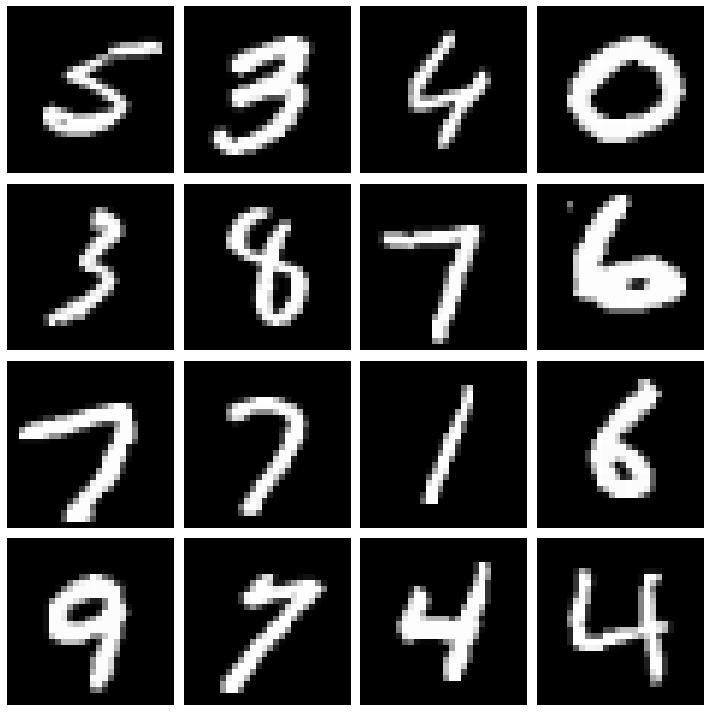

In [ ]:
mnist_dcgan.plot_images(fake=False)

Y hasta aquí el módulo de deep learning. Como podréis observar hemos hecho un gran recorrido por el deep learning, empezando con los aspetos más básicos hasta acabar con la implmentación de modelos genereativos. Espero que hayáis aprendido mucho!